In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
from colorspacious import cspace_converter


In [2]:
#open dataset
df = pd.read_csv(r'C:\Users\salom\OneDrive\Área de Trabalho\DSStudyGroup\movie_profit.csv', encoding='unicode_escape')
df.head()

,ID,release_date,movie,production_budget,domestic_gross,domestic_gross_x,worldwide_gross,worldwide_gross_x,worldwide (without USA),distributor,mpaa_rating,genre
0,229,"Friday, March 15, 2019",Wonder Park,100000000.0,0.0,0.0,0.0,0.0,0,Paramount Pictures,PG,Adventure
1,31,"Friday, December 21, 2018",Aquaman,160000000.0,0.0,0.0,0.0,0.0,0,Warner Bros.,PG-13,Action
2,1141,"Friday, October 12, 2018",Goosebumps 2: Haunted Halloween,35000000.0,28804812.0,0.8,39904812.0,1.1,11100000,Sony Pictures,PG,Horror
3,619,"Friday, October 12, 2018",First Man,60000000.0,30000050.0,0.5,55500050.0,0.9,25500000,Universal,PG-13,Drama
4,2987,"Friday, October 5, 2018",Hevi reissu,3800000.0,9079.0,0.0,9079.0,0.0,0,Music Box Films,NaN,Comedy


In [3]:
#dropping missing values 
df.drop(df[df['domestic_gross'] == 0].index, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 2 to 3400
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3335 non-null   int64  
 1   release_date             3335 non-null   object 
 2   movie                    3335 non-null   object 
 3   production_budget        3335 non-null   float64
 4   domestic_gross           3335 non-null   float64
 5   domestic_gross_x         3335 non-null   float64
 6   worldwide_gross          3335 non-null   float64
 7   worldwide_gross_x        3335 non-null   float64
 8   worldwide (without USA)  3335 non-null   int64  
 9   distributor              3294 non-null   object 
 10  mpaa_rating              3209 non-null   object 
 11  genre                    3335 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 338.7+ KB


In [5]:
df.describe(include= 'all')

,ID,release_date,movie,production_budget,domestic_gross,domestic_gross_x,worldwide_gross,worldwide_gross_x,worldwide (without USA),distributor,mpaa_rating,genre
count,3335.000000,3335,3335,3.335000e+03,3.335000e+03,3335.000000,3.335000e+03,3335.000000,3.335000e+03,3294,3209,3335
unique,NaN,1747,3334,NaN,NaN,NaN,NaN,NaN,NaN,180,4,5
top,NaN,"Friday, December 22, 2000",Tau ming chong,NaN,NaN,NaN,NaN,NaN,NaN,Warner Bros.,R,Drama
freq,NaN,8,2,NaN,NaN,NaN,NaN,NaN,NaN,373,1483,1212
mean,1682.925937,NaN,NaN,3.370223e+07,4.632070e+07,2.531754,9.594533e+07,4.345757,4.962464e+07,NaN,NaN,NaN
std,977.500327,NaN,NaN,3.495507e+07,5.905346e+07,8.765653,1.416962e+08,14.963713,8.999672e+07,NaN,NaN,NaN
min,1.000000,NaN,NaN,2.500000e+05,4.230000e+02,0.000000,4.230000e+02,0.000000,0.000000e+00,NaN,NaN,NaN
25%,836.500000,NaN,NaN,1.000000e+07,6.881213e+06,0.500000,1.153883e+07,0.800000,7.763800e+04,NaN,NaN,NaN
50%,1676.000000,NaN,NaN,2.000000e+07,2.648345e+07,1.100000,4.192159e+07,2.000000,1.188222e+07,NaN,NaN,NaN
75%,2516.500000,NaN,NaN,4.500000e+07,6.135976e+07,2.200000,1.201462e+08,4.000000,5.778388e+07,NaN,NaN,NaN


# Barcharts

A bar chart is a good choice when you want to show how some quantity varies among
some discrete set of items. Below will show how to create a simple bar chart showing genre count and a grouped bar chart comparing genre count in October versus the rest of the year. 


## Simple Barchart

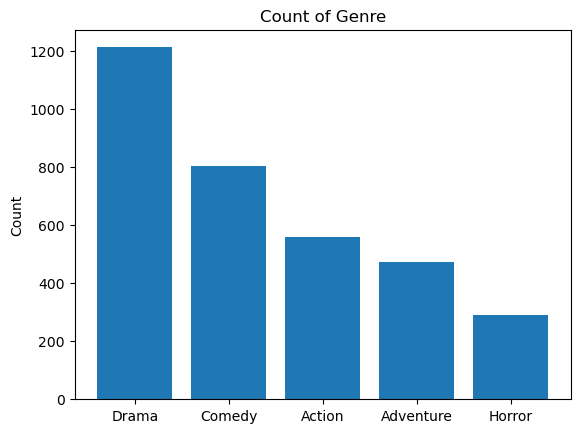

In [6]:
Count = df['genre'].value_counts()
Genre = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror']


# plot bars with left x-coordinates [0, 200, 400, 600, 800, 1000, 1200], heights = Count
plt.bar(range(len(Genre)), Count)
plt.title("Count of Genre") # add a title
plt.ylabel("Count") # label the y-axis

# label x-axis with genre names at bar centers
plt.xticks(range(len(Genre)), Genre)
plt.show()


## Grouped Barchart Comparing Genre Count During October and the Rest of the Year

In [7]:
#genre count for whole year
count = df['genre'].value_counts()
print(count)

Drama        1212
Comedy        803
Action        559
Adventure     471
Horror        290
Name: genre, dtype: int64


In [8]:
#isolating dataset to just October
oct_df = df[df['release_date'].str.contains('October')]
count_oct = oct_df['genre'].value_counts()
print(count_oct)

Drama        155
Comedy        67
Horror        53
Action        40
Adventure     23
Name: genre, dtype: int64


In [9]:
#creating dataframe for bar chart 
df_bar = pd.DataFrame() 

#engineering columns 
df_bar['Count'] = count
df_bar['Count_Oct'] = count_oct

#creating column based on percent so x axis can be similar
df_bar['Count_Percent'] = (df_bar['Count']/df_bar['Count'].sum())*100
df_bar['Count_Oct_Percent'] = (df_bar['Count_Oct']/df_bar['Count_Oct'].sum())*100

#resetting index 
df_bar.reset_index(inplace = True)

#changing column name 
df_bar = df_bar.rename(columns={'index': 'Genre'})
df_bar.head()

,Genre,Count,Count_Oct,Count_Percent,Count_Oct_Percent
0,Drama,1212,155,36.341829,45.857988
1,Comedy,803,67,24.077961,19.822485
2,Action,559,40,16.761619,11.834320
3,Adventure,471,23,14.122939,6.804734
4,Horror,290,53,8.695652,15.680473


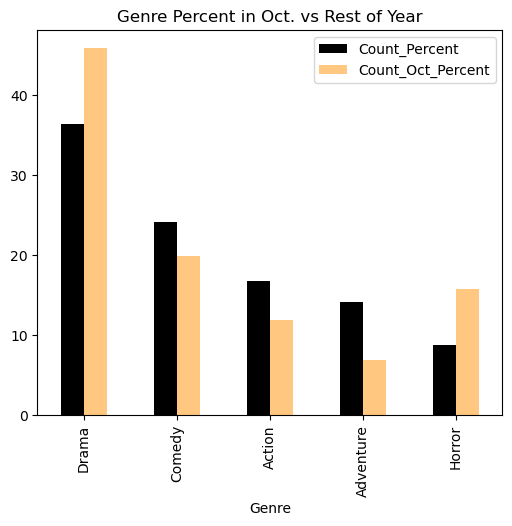

In [10]:
# plot the dataframe
df_bar.plot(x='Genre', y=['Count_Percent', 'Count_Oct_Percent'], title = 'Genre Percent in Oct. vs Rest of Year', kind="bar", colormap='copper', figsize=(6, 5))
 
# print bar graph
plt.show()

# Matplotlib Colors

https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Boxplot

In [12]:
df.describe()

,ID,production_budget,domestic_gross,domestic_gross_x,worldwide_gross,worldwide_gross_x,worldwide (without USA)
count,3335.000000,3.335000e+03,3.335000e+03,3335.000000,3.335000e+03,3335.000000,3.335000e+03
mean,1682.925937,3.370223e+07,4.632070e+07,2.531754,9.594533e+07,4.345757,4.962464e+07
std,977.500327,3.495507e+07,5.905346e+07,8.765653,1.416962e+08,14.963713,8.999672e+07
min,1.000000,2.500000e+05,4.230000e+02,0.000000,4.230000e+02,0.000000,0.000000e+00
25%,836.500000,1.000000e+07,6.881213e+06,0.500000,1.153883e+07,0.800000,7.763800e+04
50%,1676.000000,2.000000e+07,2.648345e+07,1.100000,4.192159e+07,2.000000,1.188222e+07
75%,2516.500000,4.500000e+07,6.135976e+07,2.200000,1.201462e+08,4.000000,5.778388e+07
max,3401.000000,1.750000e+08,4.745447e+08,239.800000,1.304866e+09,431.500000,8.880970e+08


In [13]:
gross_sort = df.sort_values(by='worldwide_gross_x', ascending=False)
gross_sort.head(10)

,ID,release_date,movie,production_budget,domestic_gross,domestic_gross_x,worldwide_gross,worldwide_gross_x,worldwide (without USA),distributor,mpaa_rating,genre
1114,3365,"Friday, September 25, 2009",Paranormal Activity,450000.0,107918810.0,239.8,194183034.0,431.5,86264224,Paramount Pictures,R,Horror
2547,3339,"Wednesday, July 14, 1999",The Blair Witch Project,600000.0,140539099.0,234.2,248300000.0,413.8,107760901,Artisan,R,Horror
3397,3320,"Thursday, August 13, 1942",Bambi,858000.0,102797000.0,119.8,268000000.0,312.4,165203000,RKO Radio Pictures,G,Drama
3337,3257,"Sunday, November 21, 1976",Rocky,1000000.0,117235147.0,117.2,225000000.0,225.0,107764853,United Artists,PG,Drama
3320,3382,"Tuesday, October 17, 1978",Halloween,325000.0,47000000.0,144.6,70000000.0,215.4,23000000,Compass International,R,Horror
3359,3330,"Saturday, August 11, 1973",American Graffiti,777000.0,115000000.0,148.0,140000000.0,180.2,25000000,Universal,PG,Drama
1883,3370,"Friday, June 11, 2004",Napoleon Dynamite,400000.0,44540956.0,111.4,46122713.0,115.3,1581757,Fox Searchlight,PG,Comedy
3299,3345,"Friday, May 9, 1980",Friday the 13th,550000.0,39754601.0,72.3,59754601.0,108.6,20000000,Paramount Pictures,NaN,Horror
763,3258,"Friday, January 6, 2012",The Devil Inside,1000000.0,53262945.0,53.3,101759490.0,101.8,48496545,Paramount Pictures,R,Horror
3399,2983,"Friday, December 15, 1939",Gone with the Wind,3900000.0,198680470.0,50.9,390525192.0,100.1,191844722,MGM,G,Drama


In [15]:
df_boxplot = df[['genre', 'worldwide_gross_x']]
df_boxplot.head()

,genre,worldwide_gross_x
2,Horror,1.1
3,Drama,0.9
4,Comedy,0.0
5,Action,4.6
6,Drama,5.6


In [16]:
df_boxplot.describe()

,worldwide_gross_x
count,3335.000000
mean,4.345757
std,14.963713
min,0.000000
25%,0.800000
50%,2.000000
75%,4.000000
max,431.500000


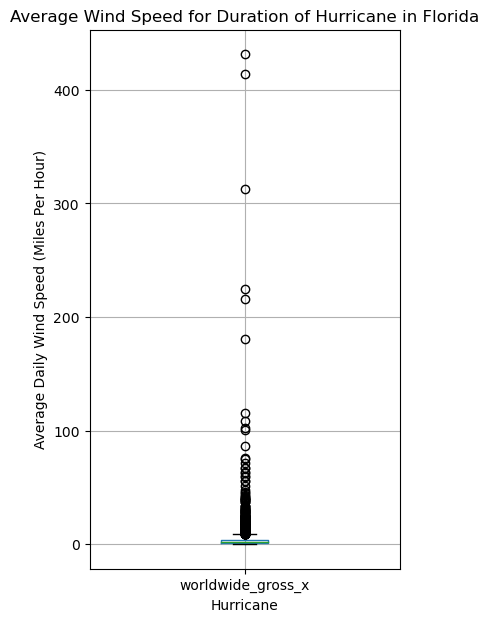

In [17]:
box = df_boxplot.boxplot(figsize = (4,7,));
box.plot()
#adding title
plt.title('Average Wind Speed for Duration of Hurricane in Florida')
#adding xlabel 
plt.xlabel('Hurricane')
#adding ylabel
plt.ylabel('Average Daily Wind Speed (Miles Per Hour)');

In [18]:
df_boxplot = df_boxplot.pivot(columns='genre', values='worldwide_gross_x')

df_boxplot

genre,Action,Adventure,Comedy,Drama,Horror
2,NaN,NaN,NaN,NaN,1.1
3,NaN,NaN,NaN,0.9,NaN
4,NaN,NaN,0.0,NaN,NaN
5,4.6,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,5.6,NaN
...,...,...,...,...,...
3396,NaN,NaN,NaN,10.1,NaN
3397,NaN,NaN,NaN,312.4,NaN
3398,NaN,36.8,NaN,NaN,NaN
3399,NaN,NaN,NaN,100.1,NaN


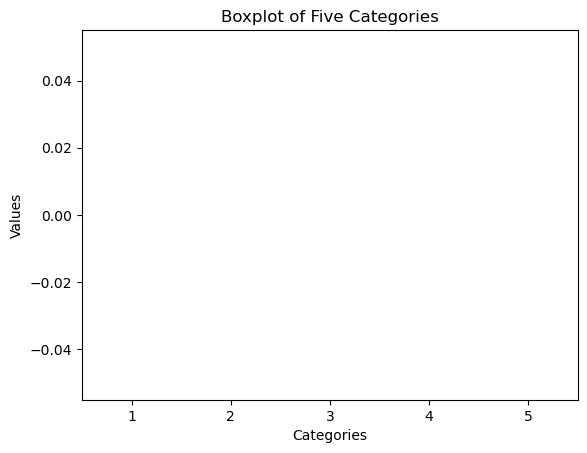

In [20]:


plt.boxplot(df_boxplot)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Boxplot of Five Categories')

plt.show()

# Linegraphs
These are a good choice for showing trends. Let's create a linegraph showing how horror movies perform over the year 

In [ ]:
# Convert the 'Date' column to datetime type if it's not already
df['date'] = pd.to_datetime(df['release_date'])

# Create a new column 'Month' with just the month
df['month'] = df['date'].dt.month

In [ ]:
#let's keep only values from 'Horror' 
df_horror = df[df['genre'].str.contains('Horror')]

In [ ]:
df_horror

In [ ]:
df_scatter = df_horror

In [ ]:
df_horror = df_horror[['month', 'domestic_gross', 'worldwide_gross']]
df_horror.head()

In [ ]:
df_horror = df_horror.groupby('month').sum()
df_horror

In [ ]:
df_horror.reset_index(inplace=True)

In [ ]:
# plot the dataframe
df_horror.plot(x='month', y=['domestic_gross', 'worldwide_gross'], title = 'Horror Movie Revenue', kind="line", colormap='Dark2', figsize=(6, 5))
 
# print bar graph
plt.show()


# Scatterplot

In [ ]:
df_scatter.head()

In [ ]:
df_scatter['day'] = df_scatter['date'].dt.day

In [ ]:
df_scatter

In [ ]:
df_scatter = df_scatter[['day', 'worldwide_gross']]
df_scatter

In [ ]:
df_scatter = df_scatter.groupby('day').mean()
df_scatter

In [ ]:
df_scatter.reset_index(inplace=True)

In [ ]:
# plot the dataframe
df_scatter.plot(x='day', y='worldwide_gross', title = 'Horror Movie Revenue', kind="scatter", colormap='Dark2', xticks = df_scatter['day'].unique(), grid = 'True', figsize=(10, 5))


 
# print bar graph
plt.show()